In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 31.9847
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3885
Epoch 3/100
32/32 [==============================] - 0s 967us/step - loss: 1.4662
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6582
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4352
Epoch 6/100
32/32 [==============================] - 0s 999us/step - loss: 0.3689
Epoch 7/100
32/32 [==============================] - 0s 999us/step - loss: 0.3479
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3418
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3373
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3376
Epoch 11/100
32/32 [==============================] - 0s 999us/step - loss: 0.3397
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3403
Epoch 13/100
32/32 [========

In [5]:
model.layers[0].get_weights()    ### Extract the weights and bias

[array([[ 1.9581907],
        [-3.0150747]], dtype=float32),
 array([4.958811], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9581907],
       [-3.0150747]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.958811], dtype=float32)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)    ### Extract the outputs (make predictions)

array([[ -8.6],
       [ 14.8],
       [-13. ],
       [ -5.5],
       [  9.2],
       [ 24.6],
       [ -4.7],
       [ 25.3],
       [ -2.1],
       [-12.2],
       [ -1.8],
       [ -0.1],
       [  3.6],
       [-28.5],
       [  3.7],
       [-29.1],
       [ 43.4],
       [ 17.3],
       [ 12.9],
       [ 17.3],
       [-35.5],
       [-30.9],
       [-27. ],
       [-17.9],
       [-25.2],
       [ 36.9],
       [ 14.2],
       [-10.1],
       [-21.6],
       [ -7.2],
       [ 34.5],
       [ 30.8],
       [ -9.7],
       [  3. ],
       [ -3.8],
       [  3.2],
       [-25.2],
       [ 16.8],
       [  7.5],
       [ 33.5],
       [ 21.3],
       [ 21.6],
       [-29.7],
       [ -1.1],
       [ -2.9],
       [ 22.3],
       [ 10.7],
       [ 18.1],
       [ 44.8],
       [ 28.3],
       [  4.7],
       [ 41.1],
       [ 42.6],
       [ -3.4],
       [-13.6],
       [-11.8],
       [ 12.6],
       [ 25.5],
       [ -7.4],
       [ 22.1],
       [ -7.6],
       [-28.8],
       [

In [9]:
training_data['targets'].round(1)

array([[ -9.1],
       [ 15.6],
       [-13.9],
       [ -4.4],
       [  9.4],
       [ 23.4],
       [ -3.5],
       [ 26.1],
       [ -1.5],
       [-12.5],
       [ -2.1],
       [ -0.1],
       [  2.9],
       [-28.5],
       [  2.5],
       [-29.1],
       [ 42.7],
       [ 17.5],
       [ 12.6],
       [ 16.1],
       [-35. ],
       [-31.9],
       [-26.9],
       [-17.6],
       [-24.4],
       [ 37.2],
       [ 14.2],
       [ -8.9],
       [-21.6],
       [ -7.1],
       [ 35.6],
       [ 30.6],
       [ -8.5],
       [  3. ],
       [ -4.1],
       [  2.7],
       [-26.3],
       [ 16.3],
       [  7.1],
       [ 34.3],
       [ 20.6],
       [ 21.4],
       [-29.7],
       [ -1.4],
       [ -2.9],
       [ 21.7],
       [ 10. ],
       [ 17.7],
       [ 45.2],
       [ 28.8],
       [  4. ],
       [ 42. ],
       [ 42.7],
       [ -3.8],
       [-12.6],
       [-11.8],
       [ 13.3],
       [ 25.3],
       [ -7.7],
       [ 21.6],
       [ -7.1],
       [-28.4],
       [

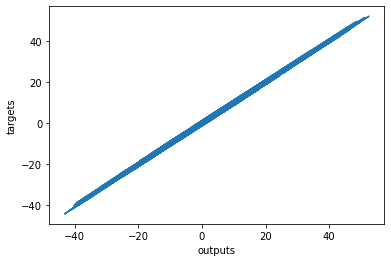

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))   ### Plotting the data
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()